In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
https://insights.stackoverflow.com/survey

In [2]:
results_df = pd.read_csv("stack-overflow-developer-survey-2023/survey_results_public.csv", index_col='ResponseId')
schema_df = pd.read_csv("stack-overflow-developer-survey-2023/survey_results_schema.csv", index_col='qname')

In [3]:
# check the question corresponding to the column name
# survey_results_schema & survey_results_public has some different question name
schema_df.loc['CompTotal', 'question']

'What is your current total <b>annual</b> compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent yearly salary. If you prefer not to answer, please leave the box empty.'

## Employment

### All Respondents
https://survey.stackoverflow.co/2023/#employment-employment

In [4]:
unique_emp_list = []

for items in results_df['Employment'].dropna().unique():
    for item in items.split(';'):
        if item in unique_emp_list:
            pass
        else:
            unique_emp_list.append(item)


unique_emp_count_list = []

for emp in unique_emp_list:
    val = results_df.loc[results_df['Employment'].str.contains(emp, na=False, regex=False), 'Employment'].count()
    unique_emp_count_list.append(val)

<Axes: >

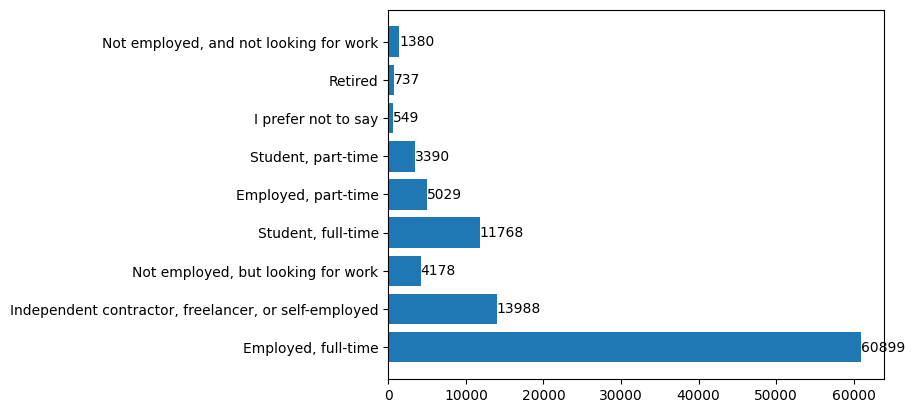

In [5]:
fig, ax = plt.subplots()

bars = ax.barh(unique_emp_list, unique_emp_count_list)
ax.bar_label(bars)
ax

### Professional Developers
https://survey.stackoverflow.co/2023/#employment-employment-prof

In [6]:
pro_df = results_df.loc[results_df['MainBranch'] == 'I am a developer by profession']

unique_pro_emp_list = []

for items in pro_df['Employment'].dropna().unique():
    for item in items.split(';'):
        if item in unique_pro_emp_list:
            pass
        else:
            unique_pro_emp_list.append(item)


pro_emp_counts = []

for emp in unique_pro_emp_list:
    val = pro_df.loc[pro_df['Employment'].str.contains(emp, na=False, regex=False), 'Employment'].count()
    pro_emp_counts.append(val)

<Axes: >

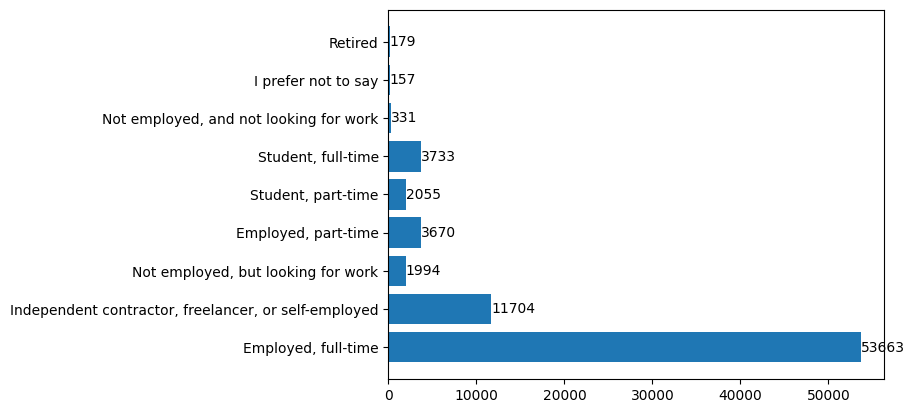

In [7]:
fig, ax = plt.subplots()

bars = ax.barh(unique_pro_emp_list, pro_emp_counts)
ax.bar_label(bars)
ax

## Company info

<Axes: >

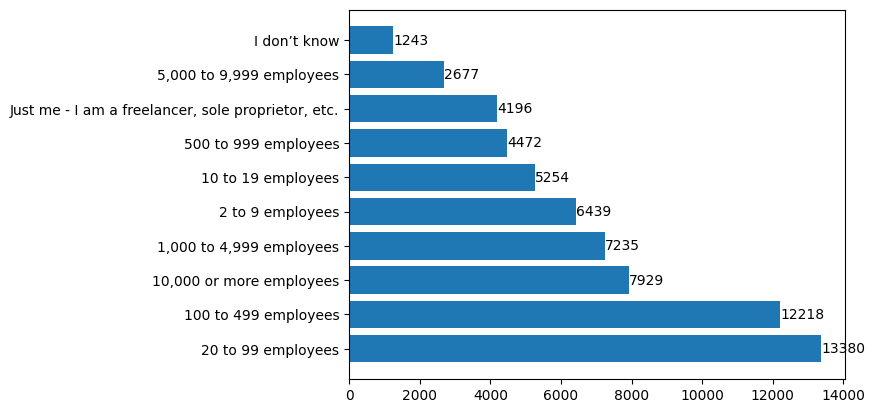

In [8]:
fig, ax = plt.subplots()

bars = ax.barh(results_df['OrgSize'].value_counts().index, results_df['OrgSize'].value_counts().values)
ax.bar_label(bars)
ax

## Salary

### Salary by developer type 

#### All Respondents 
https://survey.stackoverflow.co/2023/#salary-comp-total

<Axes: >

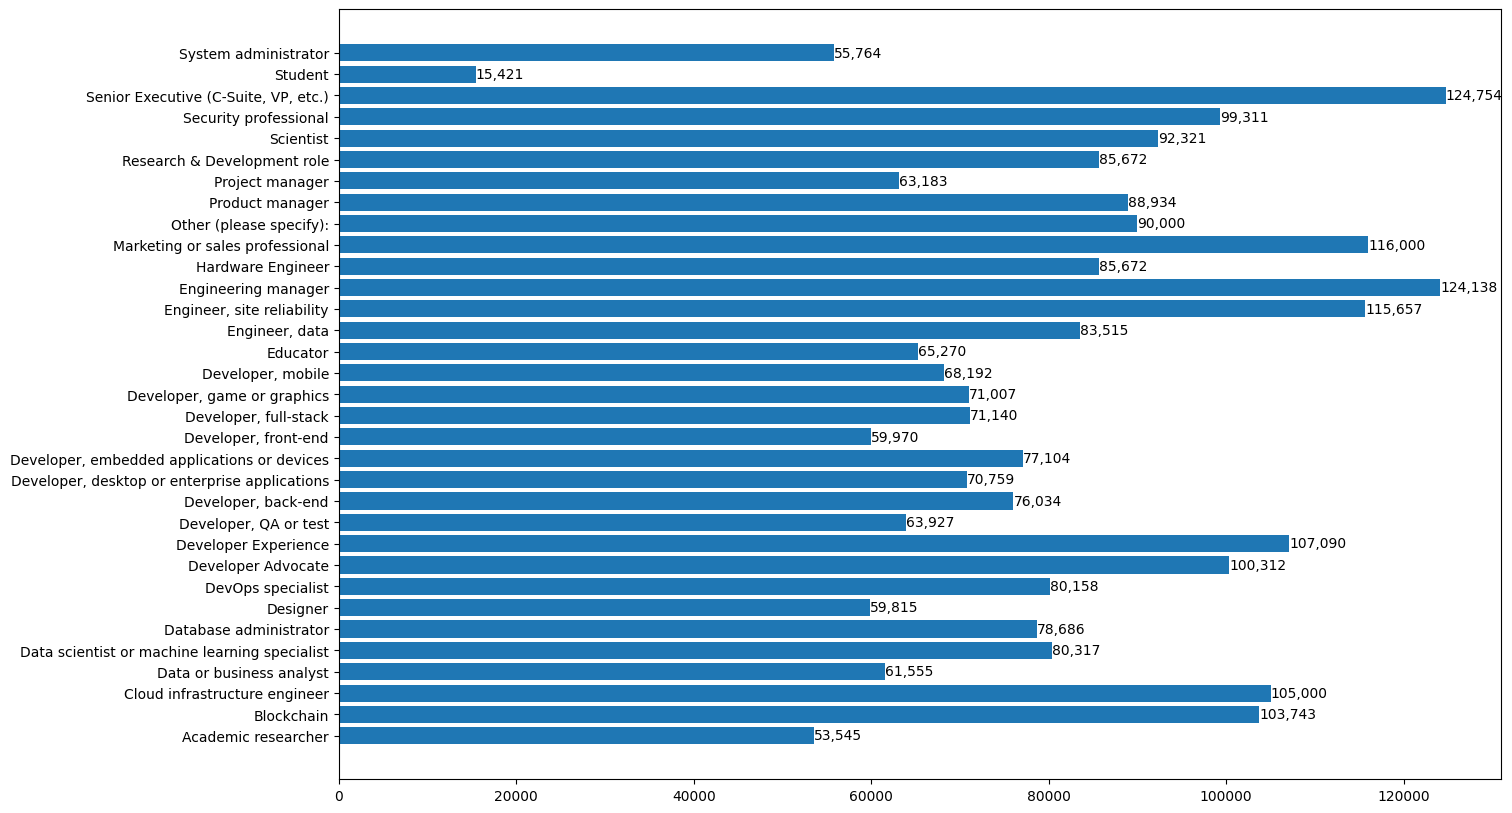

In [9]:
dev_grp_df = results_df.groupby('DevType')['ConvertedCompYearly'].describe()

median_salary = np.array([f'{i:,.0f}' for i in dev_grp_df['50%'].values])

fig, ax = plt.subplots(figsize=(15, 10))

# dev_grp_df['50%']
# accessing median value from described dataframe
bars = ax.barh(dev_grp_df['50%'].index, dev_grp_df['50%'].values)
ax.bar_label(bars, median_salary)
ax

#### United States
https://survey.stackoverflow.co/2023/#salary-united-states

In [10]:
top_countries = results_df['Country'].value_counts().nlargest().index
top_countries

Index(['United States of America', 'Germany', 'India',
       'United Kingdom of Great Britain and Northern Ireland', 'Canada'],
      dtype='object', name='Country')

<Axes: >

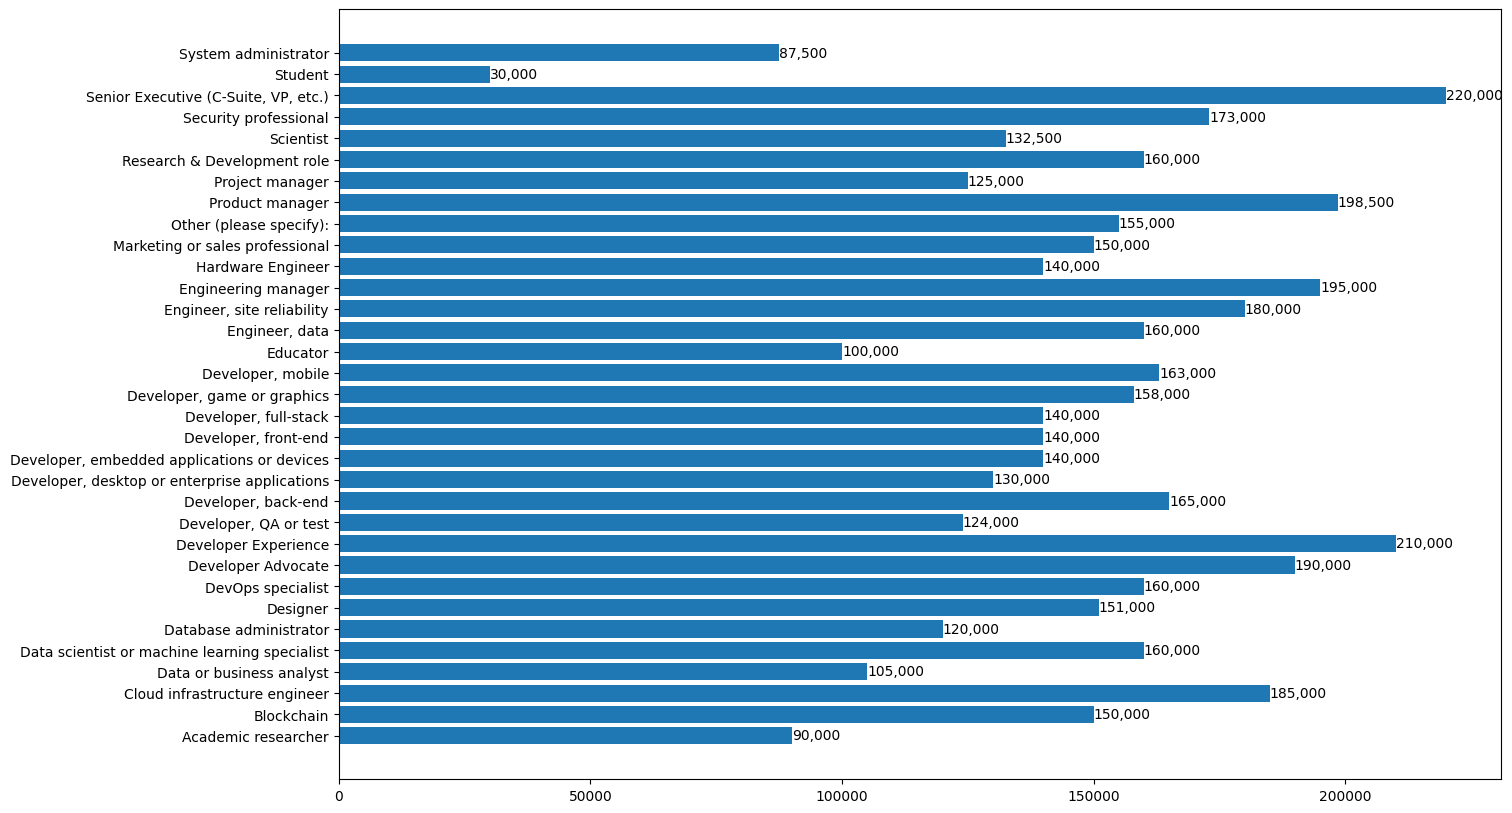

In [11]:
country_df = results_df.loc[results_df['Country'] == 'United States of America']

us_dev_grp_df = country_df.groupby('DevType')['ConvertedCompYearly'].describe()
median_salary = np.array([f'{i:,.0f}' for i in us_dev_grp_df['50%'].values])


fig, ax = plt.subplots(figsize=(15, 10))

bars = ax.barh(us_dev_grp_df['50%'].index, us_dev_grp_df['50%'].values)
ax.bar_label(bars, labels=median_salary)
ax

#### India 
https://survey.stackoverflow.co/2023/#salary-united-states

<Axes: >

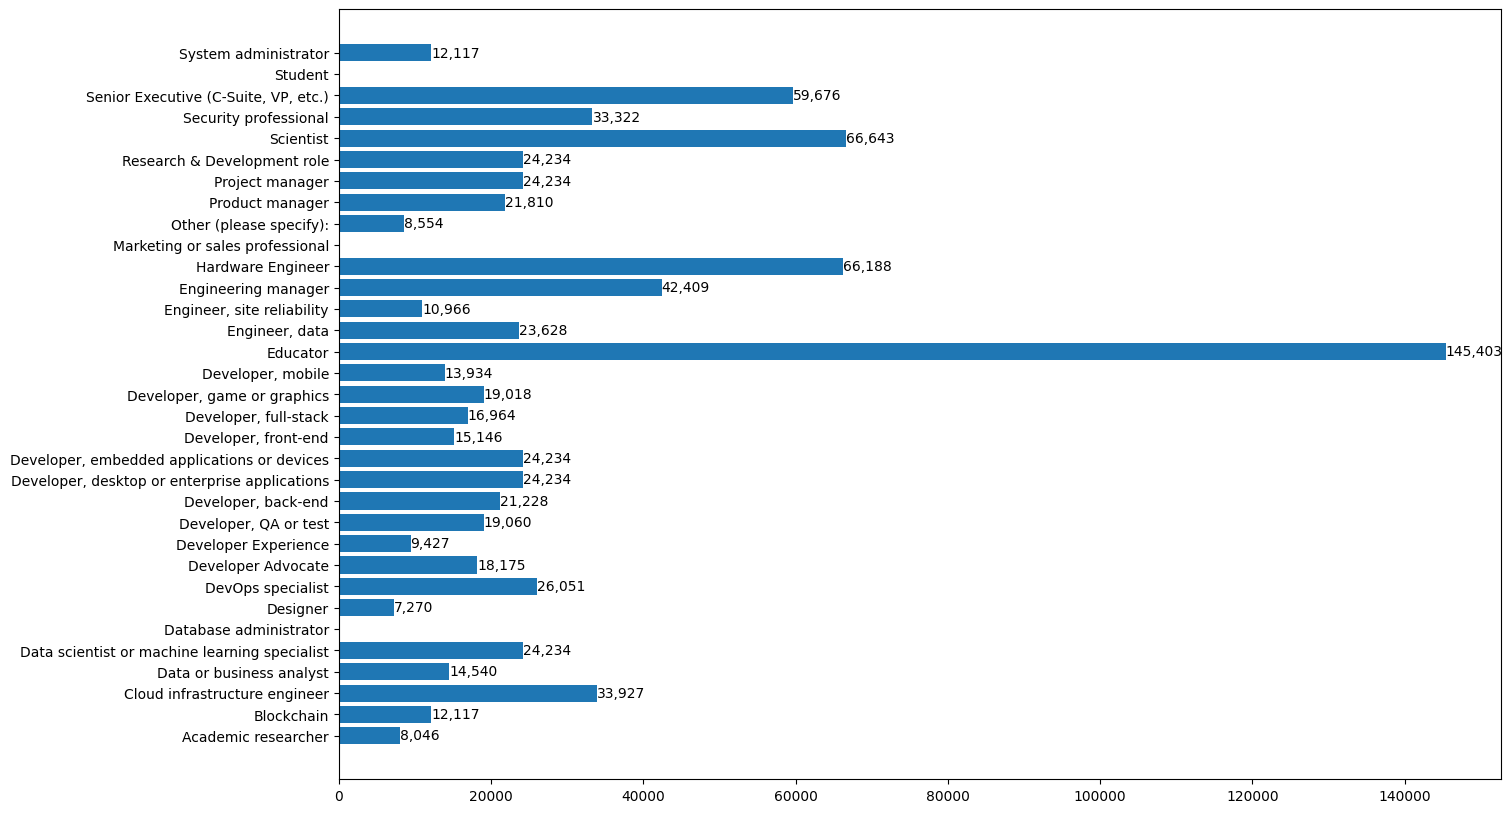

In [12]:
country_df = results_df.loc[results_df['Country'] == 'India']

ind_dev_grp_df = country_df.groupby('DevType')['ConvertedCompYearly'].describe()
median_salary = np.array([f'{i:,.0f}' for i in ind_dev_grp_df['50%'].values])


fig, ax = plt.subplots(figsize=(15, 10))

# # dev_grp_df['50%']
# # accessing median value from described dataframe
bars = ax.barh(ind_dev_grp_df['50%'].index, ind_dev_grp_df['50%'].values)
ax.bar_label(bars, labels=median_salary)
ax

#### Germany
https://survey.stackoverflow.co/2023/#salary-germany

<Axes: >

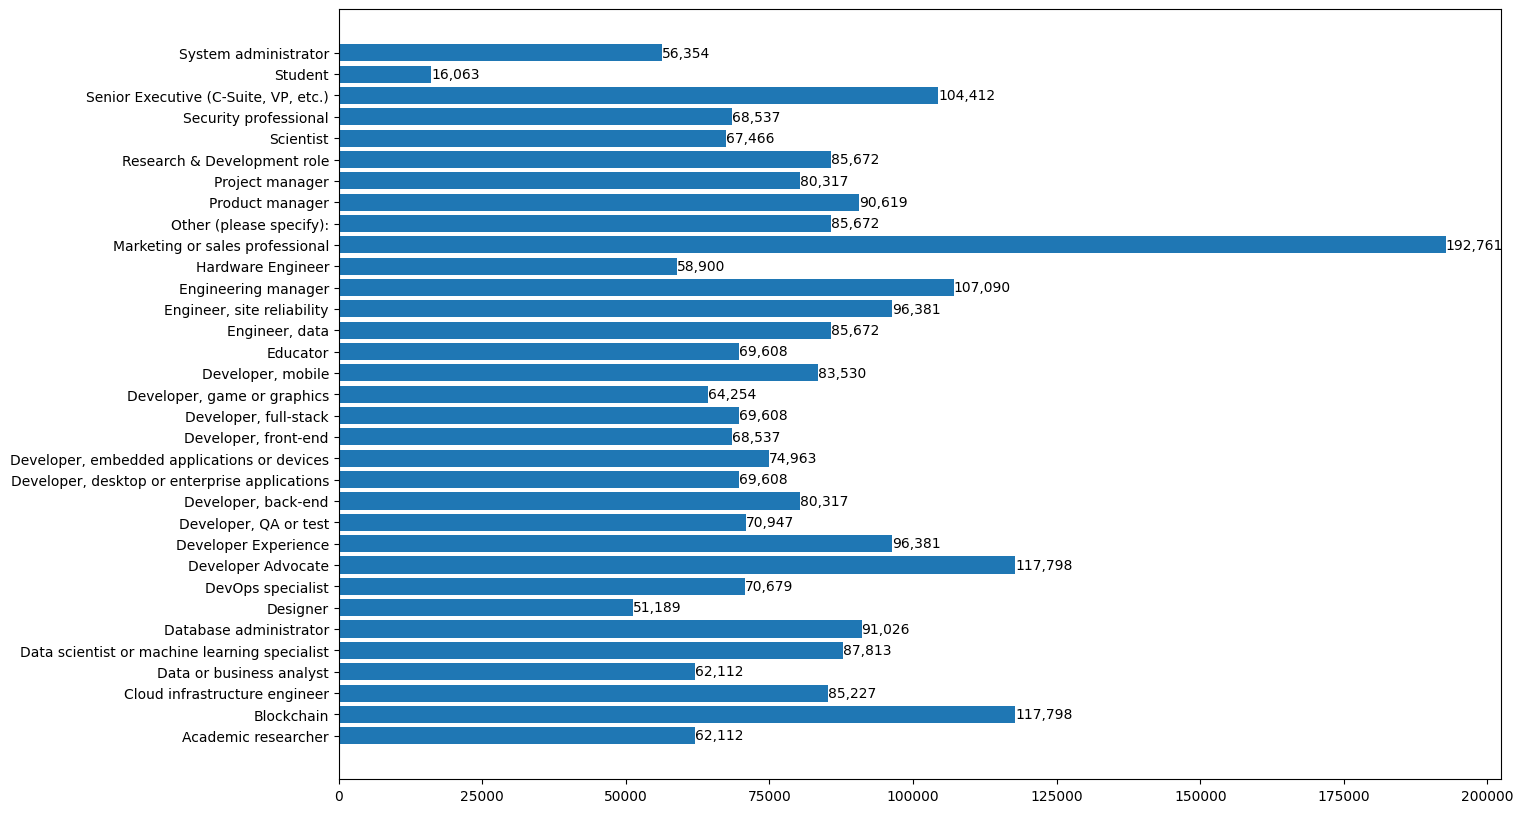

In [13]:
country_df = results_df.loc[results_df['Country'] == 'Germany']

ger_dev_grp_df = country_df.groupby('DevType')['ConvertedCompYearly'].describe()
median_salary = np.array([f'{i:,.0f}' for i in ger_dev_grp_df['50%'].values])


fig, ax = plt.subplots(figsize=(15, 10))

# # dev_grp_df['50%']
# # accessing median value from described dataframe
bars = ax.barh(ger_dev_grp_df['50%'].index, ger_dev_grp_df['50%'].values)
ax.bar_label(bars, labels=median_salary)
ax

#### United Kingdom
https://survey.stackoverflow.co/2023/#salary-united-kingdom

In [14]:
top_countries

Index(['United States of America', 'Germany', 'India',
       'United Kingdom of Great Britain and Northern Ireland', 'Canada'],
      dtype='object', name='Country')

<Axes: >

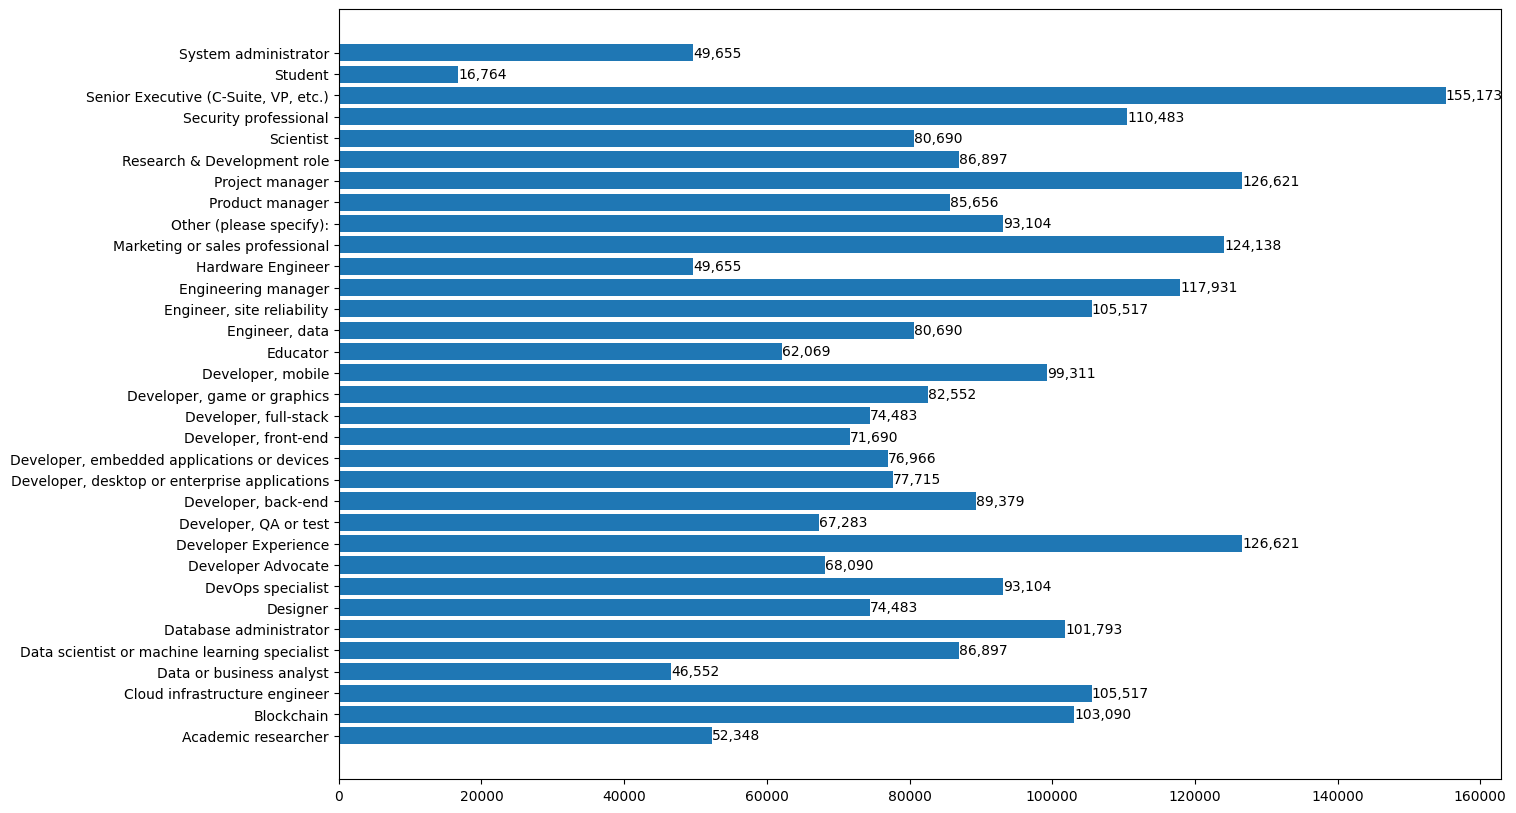

In [15]:
country_df = results_df.loc[results_df['Country'] == 'United Kingdom of Great Britain and Northern Ireland']

uk_dev_grp_df = country_df.groupby('DevType')['ConvertedCompYearly'].describe()
median_salary = np.array([f'{i:,.0f}' for i in uk_dev_grp_df['50%'].values])


fig, ax = plt.subplots(figsize=(15, 10))

# # dev_grp_df['50%']
# # accessing median value from described dataframe
bars = ax.barh(uk_dev_grp_df['50%'].index, uk_dev_grp_df['50%'].values)
ax.bar_label(bars, labels=median_salary)
ax

#### Canada
https://survey.stackoverflow.co/2023/#salary-canada

<Axes: >

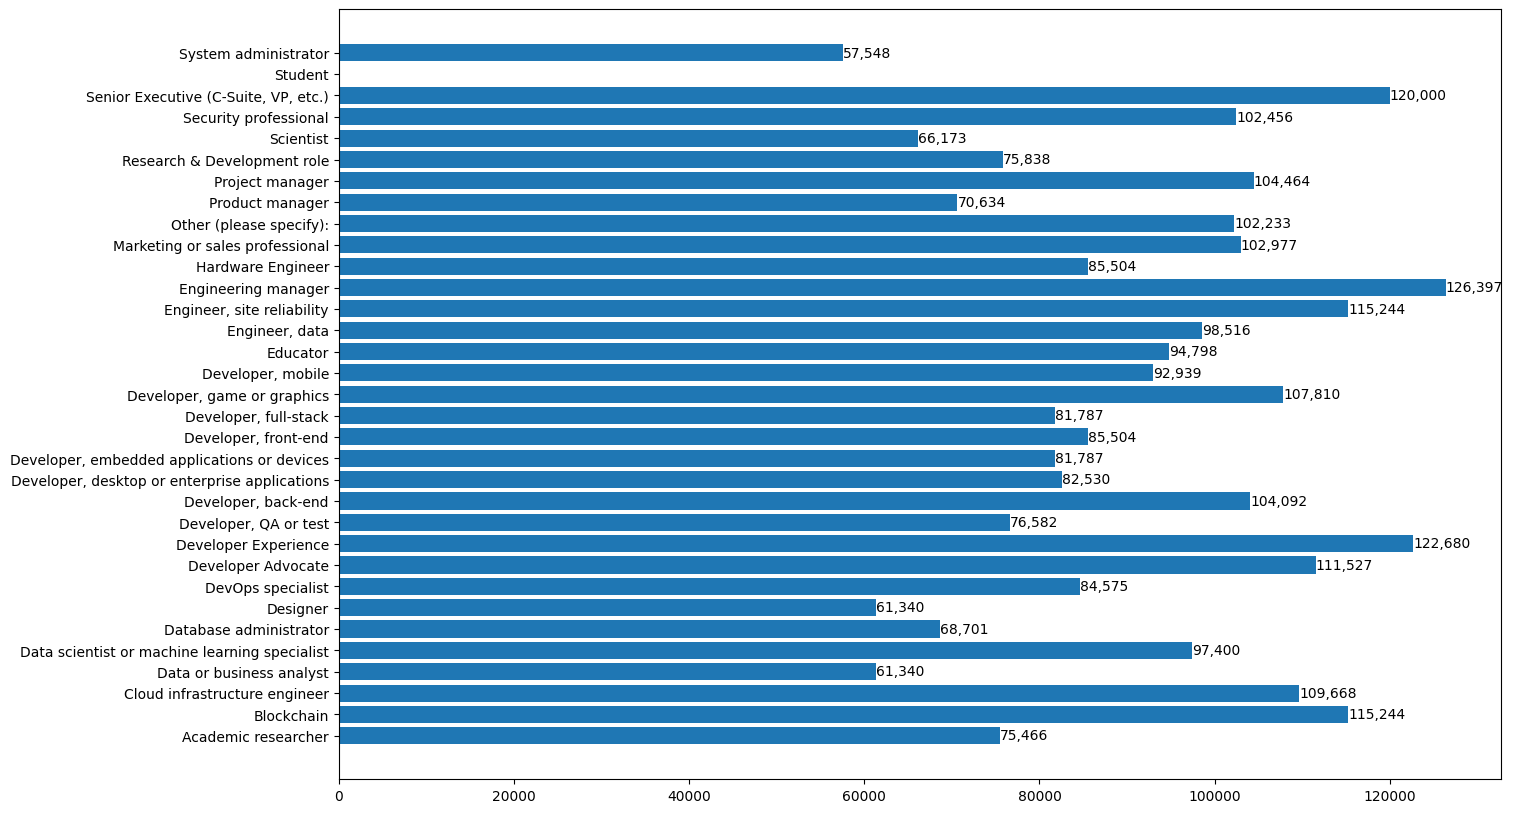

In [16]:
country_df = results_df.loc[results_df['Country'] == 'Canada']

ca_dev_grp_df = country_df.groupby('DevType')['ConvertedCompYearly'].describe()
median_salary = np.array([f'{i:,.0f}' for i in ca_dev_grp_df['50%'].values])


fig, ax = plt.subplots(figsize=(15, 10))

# # dev_grp_df['50%']
# # accessing median value from described dataframe
bars = ax.barh(ca_dev_grp_df['50%'].index, ca_dev_grp_df['50%'].values)
ax.bar_label(bars, labels=median_salary)
ax

#### Bangladesh

<Axes: >

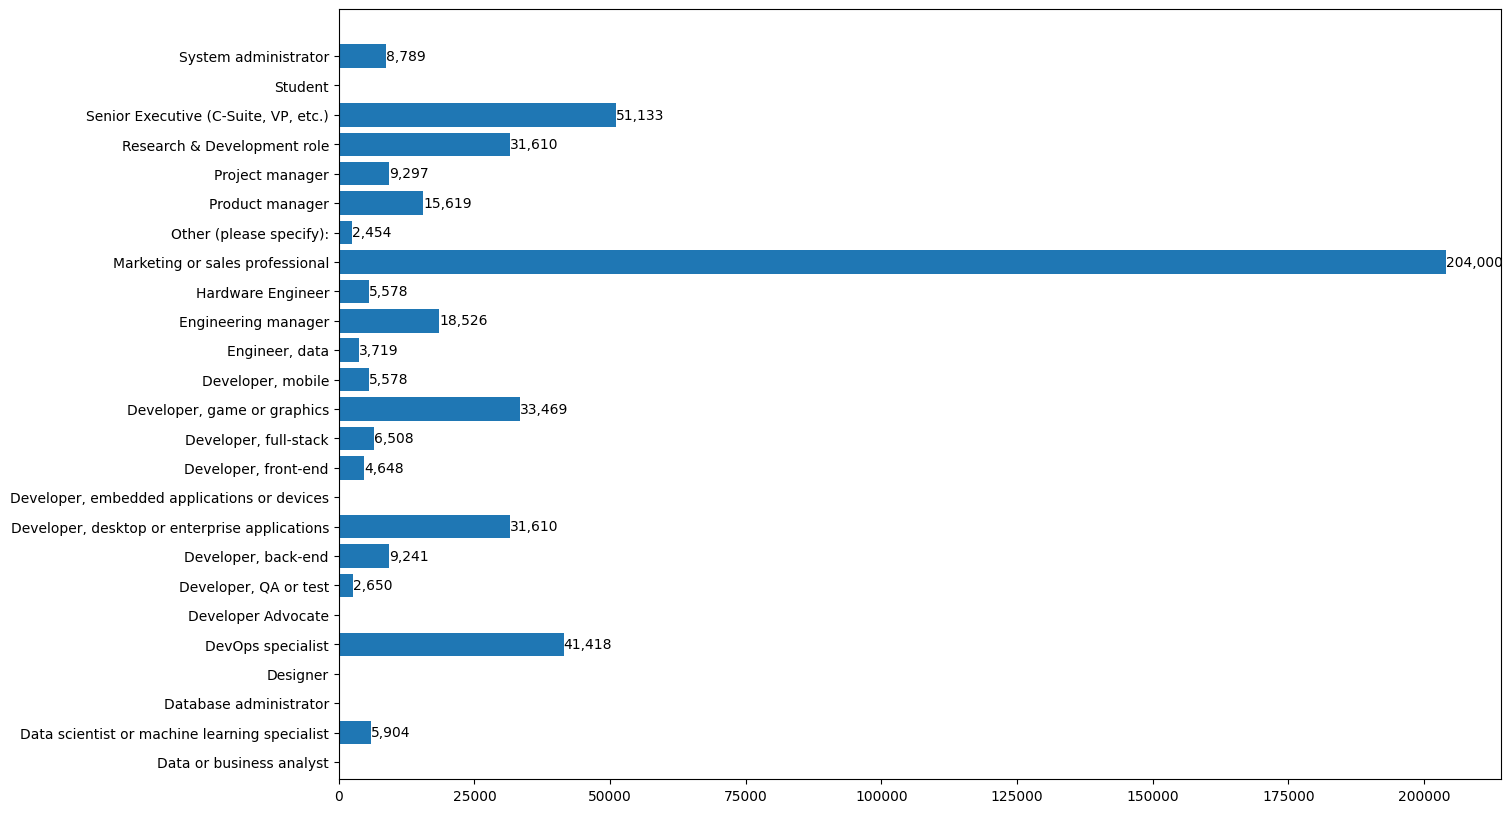

In [17]:
country_df = results_df.loc[results_df['Country'] == 'Bangladesh']

bn_dev_grp_df = country_df.groupby('DevType')['ConvertedCompYearly'].describe()
median_salary = np.array([f'{i:,.0f}' for i in bn_dev_grp_df['50%'].values])


fig, ax = plt.subplots(figsize=(15, 10))

# # dev_grp_df['50%']
# # accessing median value from described dataframe
bars = ax.barh(bn_dev_grp_df['50%'].index, bn_dev_grp_df['50%'].values)
ax.bar_label(bars, labels=median_salary)
ax

### Salary and experience by language

In [18]:
language_lst = []
for languages in results_df['LanguageHaveWorkedWith'].dropna().unique():
    for language in languages.split(';'):
        if language in language_lst:
            pass
        else:
            language_lst.append(language)
# language_lst

In [19]:
salary_and_experience_df = results_df[['ConvertedCompYearly', 'YearsCodePro', 'LanguageHaveWorkedWith']].dropna()
salary_and_experience_df = salary_and_experience_df.replace(['Less than 1 year', 'More than 50 years'], [np.nan, np.nan]).dropna()
salary_and_experience_df['YearsCodePro'] = salary_and_experience_df['YearsCodePro'].astype('float')

mean_age_list = []
median_salary_list = []
counts = []

for language in language_lst:
    info_df = salary_and_experience_df.loc[salary_and_experience_df['LanguageHaveWorkedWith'].str.contains(language, na=False, regex=False), ['ConvertedCompYearly', 'YearsCodePro']]
    
    count = info_df.shape[0]
    counts.append(count)
    
    mean_age = info_df['YearsCodePro'].mean()
    mean_age_list.append(mean_age)
    
    median_salary = info_df['ConvertedCompYearly'].median()
    median_salary_list.append(median_salary)

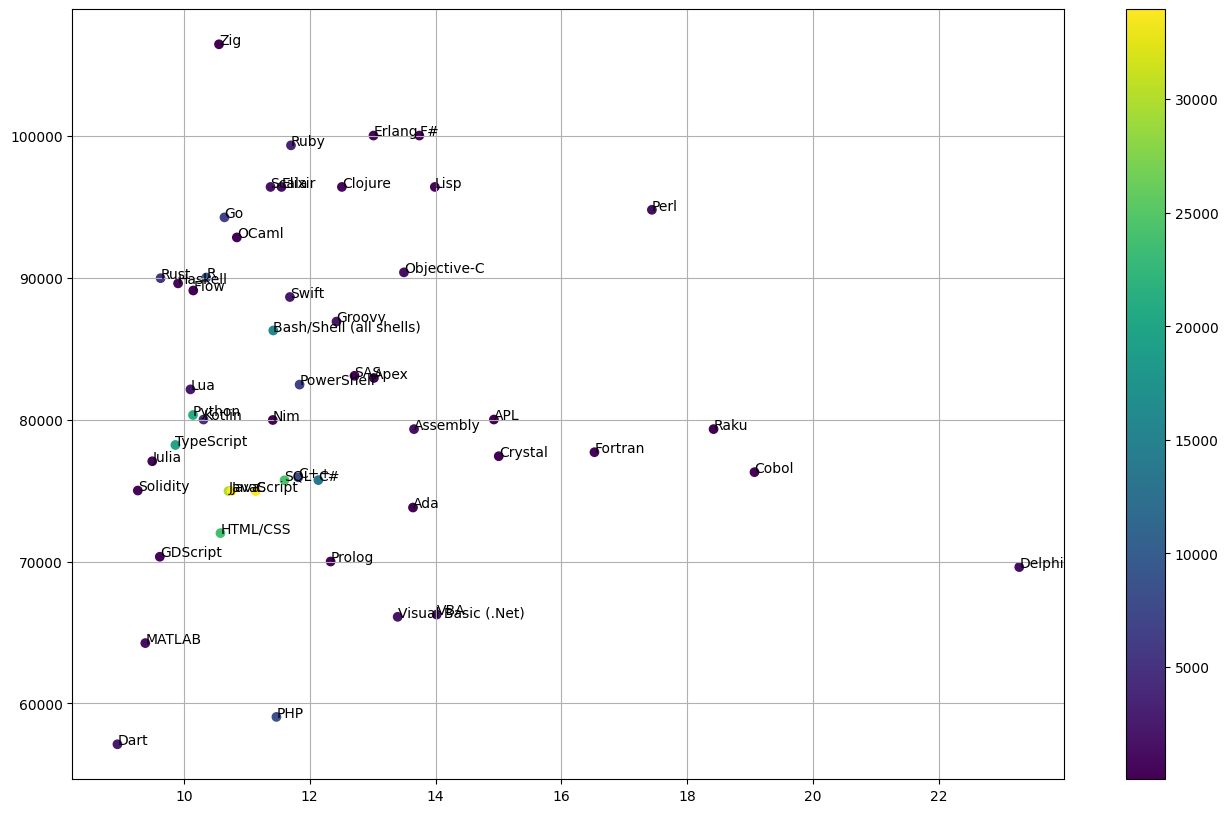

In [20]:
fig, ax = plt.subplots(figsize=(16, 10))

im = ax.scatter(mean_age_list, median_salary_list, c=counts)
ax.grid(True)
fig.colorbar(im, ax=ax)

for i, txt in enumerate(language_lst):
    ax.annotate(txt, (mean_age_list[i], median_salary_list[i]))
    # ax.annotate(counts[i], (mean_age_list[i], median_salary_list[i]))
    # ax.annotate(median_salary_list[i], (mean_age_list[i], median_salary_list[i]))

## Purchasing technology

### Influence on technology purchases

#### All Respondents
https://survey.stackoverflow.co/2023/#purchasing-technology-purchase-influence

<Axes: >

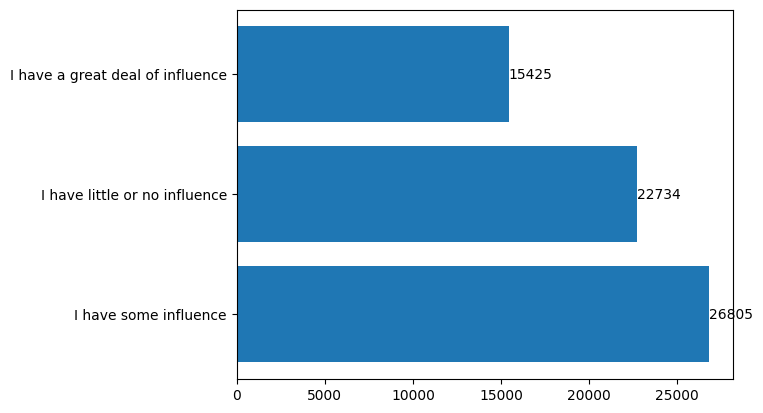

In [21]:
fig, ax = plt.subplots()

bars = ax.barh(results_df['PurchaseInfluence'].value_counts().index, results_df['PurchaseInfluence'].value_counts().values)
ax.bar_label(bars)
ax

#### By Developer Type
https://survey.stackoverflow.co/2023/#purchasing-technology-influence-dev-type

In [22]:
idx = results_df['DevType'].dropna().unique()
col = results_df['PurchaseInfluence'].dropna().unique()
info_df_counts = pd.DataFrame(index=idx, columns=col)

In [23]:
for dev_type in idx:
    val_df = results_df.loc[results_df['DevType'].str.contains(dev_type, regex=False, na=False), 'PurchaseInfluence'].value_counts()
    for _ in val_df.index:
        info_df_counts.loc[dev_type, _] = val_df.loc[_]

info_df_counts

,I have a great deal of influence,I have some influence,I have little or no influence
"Senior Executive (C-Suite, VP, etc.)",984,104,14
"Developer, back-end",1745,5140,5614
"Developer, front-end",598,1876,1841
"Developer, full-stack",6255,9527,7052
System administrator,165,227,126
"Developer, desktop or enterprise applications",917,1338,1311
"Developer, QA or test",42,195,255
Designer,60,64,63
Data scientist or machine learning specialist,235,568,514
Data or business analyst,100,232,293


### Short list or investigate new tech purchases

#### All Respondents
https://survey.stackoverflow.co/2023/#purchasing-technology-tech-list

<Axes: >

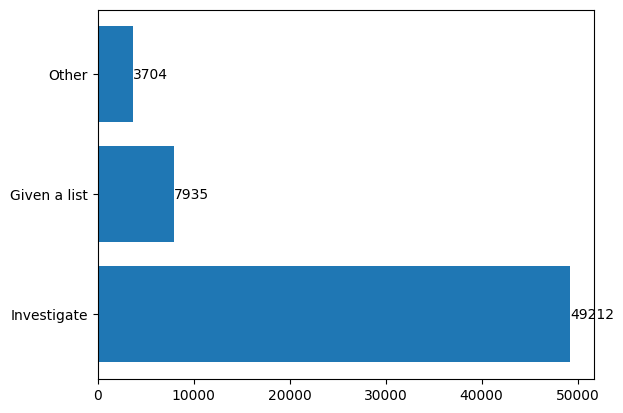

In [24]:
fig, ax = plt.subplots()

bars = ax.barh(results_df['TechList'].value_counts().index, results_df['TechList'].value_counts().values)
ax.bar_label(bars)
ax

#### By Developer Type 
https://survey.stackoverflow.co/2023/#purchasing-technology-list-dev-type

In [25]:
idx = results_df['DevType'].dropna().unique()
col = results_df['TechList'].dropna().unique()
info_df_counts = pd.DataFrame(index=idx, columns=col)

In [26]:
for dev_type in idx:
    val_df = results_df.loc[results_df['DevType'].str.contains(dev_type, regex=False, na=False), 'TechList'].value_counts()
    for _ in val_df.index:
        info_df_counts.loc[dev_type, _] = val_df.loc[_]

info_df_counts

,Investigate,Given a list,Other
"Senior Executive (C-Suite, VP, etc.)",1138,119,46
"Developer, back-end",6672,960,241
"Developer, front-end",2518,438,136
"Developer, full-stack",15743,1853,588
System administrator,505,82,17
"Developer, desktop or enterprise applications",2184,271,77
"Developer, QA or test",257,49,16
Designer,178,23,7
Data scientist or machine learning specialist,879,140,24
Data or business analyst,408,94,26


### Researching new tools and technologies

#### All Respondents
https://survey.stackoverflow.co/2023/#purchasing-technology-buy-new-tool

In [40]:
tool_list = []

for tools in results_df['BuyNewTool'].dropna().unique():
    for tool in tools.split(';'):
        if tool in tool_list:
            pass
        else:
            tool_list.append(tool)

tool_counts = []
for tool in tool_list:
    val = results_df.loc[results_df['BuyNewTool'].str.contains(tool, regex=False, na=False), 'BuyNewTool'].count()
    tool_counts.append(val)

<Axes: >

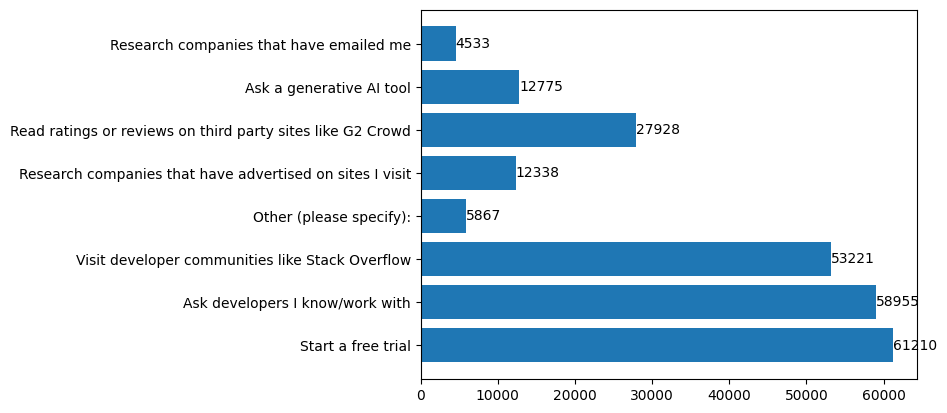

In [41]:
fig, ax = plt.subplots()

bars = ax.barh(tool_list, tool_counts)
ax.bar_label(bars)
ax

#### By Developer Type
https://survey.stackoverflow.co/2023/#purchasing-technology-buy-new-tool-dev-type

In [67]:
for dev in dev_types:
    print(dev)
    print('-'*20)

    temp_df = pd.DataFrame(index=tool_list, columns=['counts'])
    for tool in tool_list:
        mask = (results_df['DevType'] == dev) & (results_df['BuyNewTool'].str.contains(tool, na=False, regex=False))
        val = results_df.loc[mask, 'BuyNewTool'].count()
        temp_df.loc[tool] = val
        
    print(temp_df)
    print()
    print()

Senior Executive (C-Suite, VP, etc.)
--------------------
                                                   counts
Start a free trial                                   1132
Ask developers I know/work with                      1028
Visit developer communities like Stack Overflow       808
Other (please specify):                               112
Research companies that have advertised on site...    299
Read ratings or reviews on third party sites li...    553
Ask a generative AI tool                              234
Research companies that have emailed me               183


Developer, back-end
--------------------
                                                   counts
Start a free trial                                   9797
Ask developers I know/work with                      9989
Visit developer communities like Stack Overflow      8110
Other (please specify):                               723
Research companies that have advertised on site...   1610
Read ratings or reviews on th

## Coding outside of work 

In [75]:
code_activity_list = []

for activities in results_df['CodingActivities'].dropna().unique():
    for activity in activities.split(';'):
        if activity in code_activity_list:
            pass
        else:
            code_activity_list.append(activity)

code_activity_counts = []

for activity in code_activity_list:
    val = results_df.loc[results_df['CodingActivities'].str.contains(activity, na=False, regex=False), 'CodingActivities'].count()
    code_activity_counts.append(val)

<Axes: >

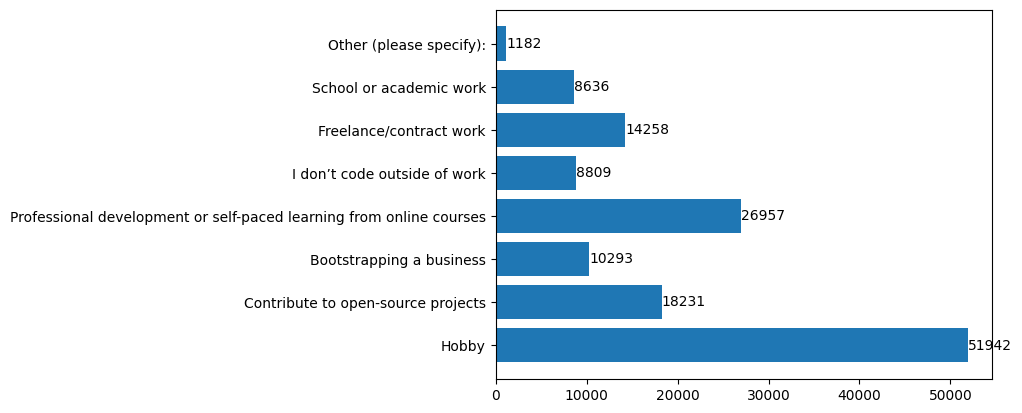

In [76]:
fig, ax = plt.subplots()

bars = ax.barh(code_activity_list, code_activity_counts)
ax.bar_label(bars)
ax